In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
import seaborn as sns
import plotly.express as px
import math

## 2.14 Máxima verosimilitud 
---
### Binomial:

$p(x; n, p) = \binom{n}{x} p^x (1-p)^{n-x}$

$L(\theta) = \prod_{i=1}^{n} p(x_i; n, \theta) = \prod_{i=1}^{n} \binom{n}{x_i} \theta^{x_i} (1-\theta)^{n-x_i}$

$\ln L(\theta) = \sum_{i=1}^{n} \left( \ln \binom{n}{x_i} + x_i \ln \theta + (n-x_i) \ln (1-\theta) \right)$

Derivamos e igualamos a 0:

$\frac{d}{d\theta} \ln L(\theta) = \sum_{i=1}^{n} \left( \frac{x_i}{\theta} - \frac{n-x_i}{1-\theta} \right) = 0$

$\frac {\sum_{i=1}^{n}x_i}{\theta} - \frac{\sum_{i=1}^{n}(n-x_i)}{1-\theta} = 0$

$\frac {\sum_{i=1}^{n}x_i}{\theta} - \frac{n^2 - \sum_{i=1}^{n}x_i }{1-\theta} = 0$

$\frac { \sum_{i=1}^{n}x_i}{\theta} =\frac {n^2 - \sum_{i=1}^{n}x_i}{1-\theta}$

$(1-\theta)\sum_{i=1}^{n}x_i  = \theta (n^2 - \sum_{i=1}^{n}x_i)$

$\sum_{i=1}^{n}x_i - \theta \sum_{i=1}^{n}x_i = \theta n^2 - \theta \sum_{i=1}^{n}x_i$

$\sum_{i=1}^{n}x_i = \theta n^2$

$\theta = \frac{\sum_{i=1}^{n}x_i}{n^2}$

### Geométrica:
$p(x; p) = p (1-p)^{x-1}$

$L(\theta) = \prod_{i=1}^{n} p(x_i; \theta) = \prod_{i=1}^{n} \theta (1-\theta)^{x_i-1}$

$\ln L(\theta) = \sum_{i=1}^{n} \left( \ln \theta + (x_i-1) \ln (1-\theta) \right)$

Derivamos e igualamos a 0:

$\frac{d}{d\theta} \ln L(\theta) = \sum_{i=1}^{n} \left( \frac{1}{\theta} - \frac{x_i-1}{1-\theta} \right) = 0$

$\frac {n}{\theta} - \frac{\sum_{i=1}^{n}(x_i-1)}{1-\theta} = 0$

$\frac {n}{\theta} = \frac{\sum_{i=1}^{n}(x_i-1)}{1-\theta}$

$\frac {n}{\theta} = \frac{-n+\sum_{i=1}^{n}x_i }{1-\theta}$

$(1-\theta)n = -n\theta + \theta \sum_{i=1}^{n}x_i$

$ n = \theta \sum_{i=1}^{n}x_i$

$\theta = \frac{1}{\bar{x}}$





### Poisson:

$p(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$

$L(\theta) = \prod_{i=1}^{n} p(k_i; \theta) = \prod_{i=1}^{n} \frac{\theta^{x_i} e^{-\theta}}{x_i!}$

Maximizar la función de verosimilitud $L(\theta)$, es lo mismo que maximizar el logaritmo de la función de verosimilitud:

$\ln L(\theta) = \sum_{i=1}^{n} \ln p(k_i; \theta) = \sum_{i=1}^{n} \left( x_i \ln \theta - \theta - \ln(x_i!) \right)$

Derivamos e igualamos a 0:

$\frac{d}{d\theta} \ln L(\theta) = \sum_{i=1}^{n} \left( \frac{x_i}{\theta} - 1 \right) = 0$

$\frac {\sum_{i=1}^{n}x_i}{\theta} - n = 0$

$\frac {\sum_{i=1}^{n}x_i}{n} = \theta$

$\theta = \bar{x}$


### Exponencial:

$p(x; \lambda) = \lambda e^{-\lambda x}$

$L(\theta) = \prod_{i=1}^{n} p(x_i; \theta) = \prod_{i=1}^{n} \theta e^{-\theta x_i}$

$\ln L(\theta) = \sum_{i=1}^{n} \left( \ln \theta - \theta x_i \right)$

$\ln L(\theta) = n*\ln \theta - \theta \sum_{i=1}^{n} x_i$

Derivamos e igualamos a 0:

$\frac{d}{d\theta} \ln L(\theta) = \frac{n}{\theta} - \sum_{i=1}^{n} x_i = 0$

$\frac{n}{\theta} = \sum_{i=1}^{n} x_i$

$\theta = \frac{n}{\sum_{i=1}^{n} x_i}$

$\theta = \frac{1}{\bar{x}}$


### Normal:
$p(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$

$L(\theta) = \prod_{i=1}^{n} p(x_i; \mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sigma \sqrt{2\pi }} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}$

$\ln L(\theta) = -\frac{n}{2} \ln(2\pi) - n \ln(\sigma) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2$

Derivamos e igualamos a 0:

$\frac{d}{d\mu} \ln L(\theta) = \frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu) = 0$

$\frac{d}{d\mu} \ln L(\sigma^2) = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{n} (x_i - \mu)^2 = 0$

Despejando:  µˆ = $\bar{x}$,  σˆ² = ${S^2(x)}$


In [2]:
distribuciones = ['Binomial', 'Geométrica', 'Poisson', 'Uniforme', 'Exponencial', 'Normal']

def maxima_verosimilitud(distribucion, datos):
    
    print(f'Distribución implementada: {distribucion}')
    
    if distribucion == 'Binomial':
        n = len(datos)
        p = sum(datos) / (n**2)
        print(f'Los parametros estimados son: nˆ = {n}, pˆ = {round(p,3)}')
        return n, p
    elif distribucion == 'Geométrica':
        p = 1 / (sum(datos) / len(datos))
        print(f'Los parametros estimados son: pˆ = {round(p,3)}')
        return p
    elif distribucion == 'Poisson':
        omega = sum(datos) / len(datos)
        print(f'Los parametros estimados son: ωˆ = {round(omega,3)}')
    elif distribucion == 'Uniforme':
        
        a = min(datos) 
        b = max(datos)
        
        print(f'Los parametros estimados son: â = {a}, b̂ = {b}')
        return a,b
        
    elif distribucion == 'Exponencial':
        lambda_ = len(datos) / sum(datos)
        print(f'Los parametros estimados son: λˆ = {round(lambda_,3)}')
        return lambda_
    
    elif distribucion == 'Normal':
        
        mu = sum(datos) / len(datos)
        sigma2 = sum((x - mu) ** 2 for x in datos) / len(datos)
        
        print(f'Los parametros estimados son: µˆ = {round(mu,3)},  σˆ² = {round(sigma2,3)}')
        return mu,sigma2

    



maxima_verosimilitud('Normal', [1, 2, 3])

Distribución implementada: Normal
Los parametros estimados son: µˆ = 2.0,  σˆ² = 0.667


(2.0, 0.6666666666666666)

### 3.1 Propiedades de χ²ₙ
Representa en una misma gráfica la función de densidad de χ²ₙ para n = 1, 2, 3, 4 y 5. Comprueba que:

- Para n = 1 y n = 2, la densidad es monótona decreciente en x ≥ 0.

- Para cualquier n ≥ 3, la densidad de χ²ₙ alcanza su máximo en x = n – 2.

- A medida que n crece, la forma de χ²ₙ se aproxime cada vez más a la de una normal N(n, 2n).

Con matplotlib

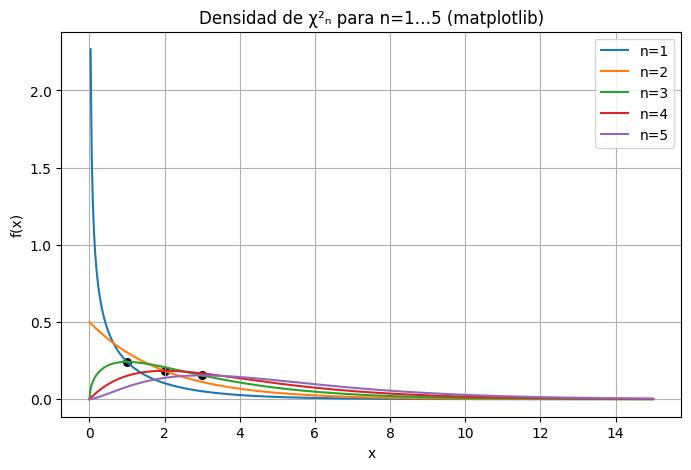

In [ ]:

# Datos
x = np.linspace(0, 15, 500)
grados = [1,2,3,4,5]

# Plot
plt.figure(figsize=(8,5))
for n in grados:
    plt.plot(x, chi2.pdf(x, df=n), label=f'n={n}')
    if n >= 3:
        plt.scatter(n-2, chi2.pdf(n-2, df=n), color='k', s=30)

plt.title('Densidad de χ²ₙ para n=1…5 (matplotlib)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Seaborn

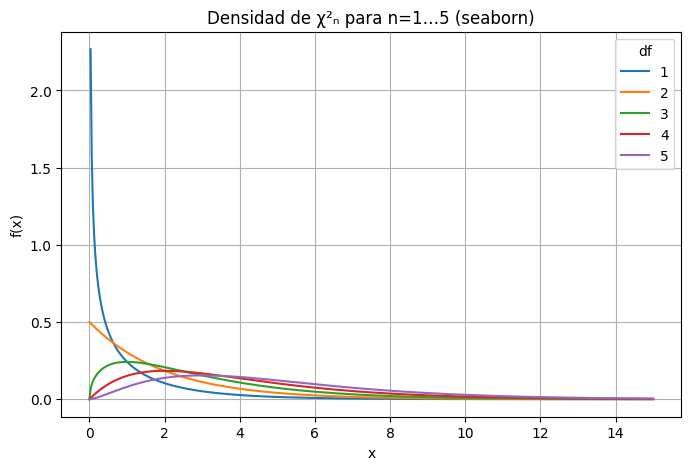

In [4]:

# Preparamos un DataFrame “largo” para seaborn
x = np.linspace(0, 15, 500)
grados = [1,2,3,4,5]
df = pd.DataFrame({
    'x': np.tile(x, len(grados)),
    'df': np.repeat(grados, len(x)),
})
df['pdf'] = df.apply(lambda row: chi2.pdf(row.x, df=int(row.df)), axis=1)

# Plot
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='x', y='pdf', hue='df', palette='tab10')
plt.title('Densidad de χ²ₙ para n=1…5 (seaborn)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()


Plotly.express

In [5]:

# Datos “largos”
x = np.linspace(0, 15, 500)
grados = [1,2,3,4,5]
data = {
    'x': np.tile(x, len(grados)),
    'df': np.repeat(grados, len(x)),
}
import pandas as pd
df = pd.DataFrame(data)
df['pdf'] = df.apply(lambda r: chi2.pdf(r.x, df=int(r.df)), axis=1)

# Plot interactivo
fig = px.line(df, x='x', y='pdf', color='df',
              title='Densidad de χ²ₙ para n=1…5 (plotly.express)',
              labels={'pdf':'f(x)', 'x':'x', 'df':'n'})
fig.update_layout(legend_title_text='Grados de libertad')
fig.show()


#### Explicación

La gráfica ilustra tres hechos fundamentales:
1. Para \(n=1,2\), la densidad baja continuamente desde \(x=0\).  
2. A partir de \(n=3\), aparece un pico en \(x = n - 2\).  
3. Al crecer \(n\), χ²ₙ se convierte cada vez más en una distribución aproximadamente normal N(n, 2n)


### 3.2 Propiedades de $t_n$

Representar en la misma gráfica las densidades de las distribuciones $t_n$ para $n = 1, 2, 5, 10, 30, 100$ y la Normal estándar $N(0,1)$.
Comprueba que para todos los valores propuestos es simétrica respecto a x = 0 y tiene
el máximo en ese mismo punto. ¿Es razonable la afirmación de que cuando n → ∞ la tn se
aproxima a la N(0, 1)? ¿Cómo de buena es la aproximación para n = 30?

Buscando la función de densidad de $t_n$:

$$ f(x) = \frac{\Gamma\left(\frac{n+1}{2}\right)}{\sqrt{n\pi},\Gamma\left(\frac{n}{2}\right)} \left(1 + \frac{x^2}{n}\right)^{-\frac{n+1}{2}} $$ 

viene dada por:

$$ f(x) = \frac{Y}{\sqrt{Z/n}} $$

donde $Y$ es una variable aleatoria con distribución normal y $Z$ es una variable aleatoria con distribución chi-cuadrado con n grados de libertad.

$$Y \sim N(0,1) \Rightarrow f(x) = \frac{1}{\sqrt{2 \pi}} e^{-x^2/2}$$
$$Z \sim \chi^2(n) \Rightarrow f(x) = \frac{1}{2^{n/2} \Gamma(n/2)} x^{(n/2)-1} e^{-x/2}$$




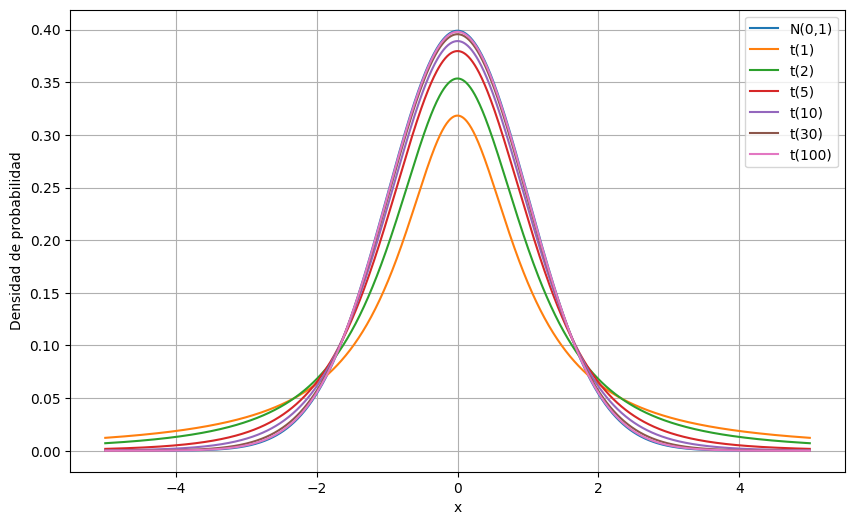

In [6]:

n_values = [1, 2, 5, 10, 30, 100]
x = np.linspace(-5, 5, 1000)

plt.figure(figsize=(10, 6))


# Densidad N(0,1)
normal = (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)
plt.plot(x, normal, label='N(0,1)')


# Densidad t de Student
for n in n_values:
    t_n = math.gamma((n+1)/2) / (np.sqrt(n*np.pi) * math.gamma(n/2)) * (1 + (x**2)/n) ** (-(n+1)/2)

    plt.plot(x, t_n, label=f't({n})')



plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid()
plt.show()



- **Para n ≤ 5** las diferencias con la Normal son notables (más valores en los extremos).  
- **Para n = 30** la tₙ ya “casi es” Normal, muy útil en contextos donde no disponemos de la varianza poblacional y usamos t para construir intervalos o contrastes.  
- **Para n ≥ 30** podemos considerar válido el uso de N(0, 1) como aproximación a tₙ en la mayoría de aplicaciones.  

### 3.13 Ejercicio de Simulación e Intervalos de Confianza

1. **Generar la muestra**  
   - Extraer 100 observaciones independientes de una distribución normal $N(\mu=10,\ \sigma=2)$.  
   - Denotar esta muestra como $\{x_1, x_2, \dots, x_{100}\}$.

2. **Calcular el intervalo de confianza al 90 % para $\mu$**  
   - Hallar la media muestral  
     $$
       \bar{x} \;=\; \frac{1}{100}\sum_{i=1}^{100} x_i.
     $$  
   - Usar la distribución $t_{99}$ (ya que $\sigma$ es desconocida y $n=100$) para construir  
     $$
       \bar{x} \;\pm\; t_{0.95,\,99}\,\frac{s}{\sqrt{100}},
     $$  
     donde $s$ es la desviación muestral y $t_{0.95,\,99}$ es el cuantil $0.95$ de $t_{99}$.  
   - Comprobar si este intervalo contiene $\mu = 10$.

3. **Repetir 1000 veces y contabilizar aciertos**  
   - Repetir los pasos 1–2 en 1000 simulaciones independientes.  
   - En cada una, construir el intervalo de confianza al 90 % y verificar si incluye $\mu=10$.  
   - Calcular el porcentaje de simulaciones en que el intervalo realmente cubre $\mu=10$.  
   - Reflexionar: dicho porcentaje debería aproximarse al 90 %.  
     - Si se observa un valor cercano a $0.90$, confirma que el método de intervalo funciona como se espera.  
     - Comentar brevemente las ventajas de usar simulación cuando no existe una teoría exacta (por ejemplo, para modelos más complejos en Ciencia de Datos).


<!-- ## 3.13: Intervalos de Confianza y Simulación Monte Carlo

**Enunciado**: 1. **Generar la muestra**  
   - Extraer 100 observaciones independientes de una distribución normal \(N(\mu=10,\ \sigma=2)\).  
   - Denotar esta muestra como \(\{x_1, x_2, \dots, x_{100}\}\).

2. **Calcular el intervalo de confianza al 90 % para \(\mu\)**  
   - Hallar la media muestral \(\displaystyle \bar{x} = \frac{1}{100}\sum_{i=1}^{100} x_i.\)  
   - Usar la distribución \(t_{99}\) (ya que \(\sigma\) es desconocida y \(n=100\)) para construir  
     \[
       \bar{x} \pm t_{0.95,\,99}\,\frac{s}{\sqrt{100}},
     \]
     donde \(s\) es la desviación muestral y \(t_{0.95,\,99}\) es el cuantil 0.95 de \(t_{99}\).  
   - Comprobar si este intervalo contiene \(\mu=10\).

3. **Repetir 1000 veces y contabilizar aciertos**  
   - Repetir los pasos 1–2 en 1000 simulaciones independientes.  
   - En cada una, construir el intervalo de confianza al 90 % y verificar si incluye \(\mu=10\).  
   - Calcular el porcentaje de simulaciones en que el intervalo realmente cubre \(\mu=10\).  
   - Reflexionar: dicho porcentaje debería aproximarse al 90 %.  
     - Si se observa un valor cercano a 0.90, confirma que el método de intervalo funciona como se espera.  

Un **intervalo de confianza** para la media (mu) cuando la desviación típica (sigma) es desconocida y la variable es aproximadamente normal se construye utilizando la distribución t de Student:

**[ media muestral ] ± [ t * (desviación muestral / raíz de n) ]**

Este intervalo tiene una probabilidad del 90% de contener el valor real de la media poblacional si se repite muchas veces el muestreo. -->


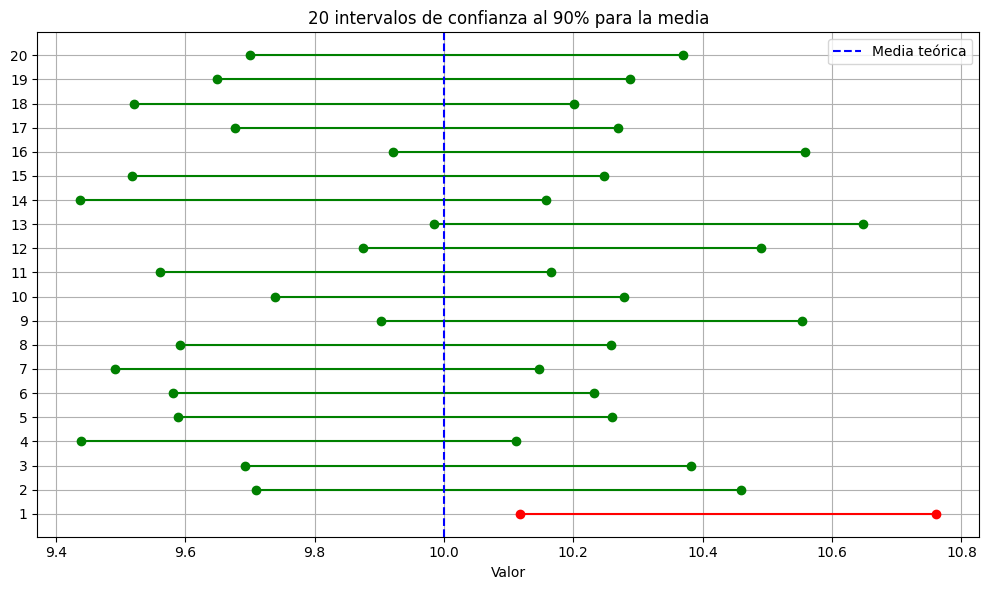

De 1000 simulaciones hay 897 en el intervalo.


In [7]:
from scipy.stats import t

# inicio
mu_teorica = 10
sigma = 2
n = 100
confianza = 0.90
simulaciones = 1000

# nivel crítico
alpha = 1 - confianza
t_critico = t.ppf(1 - alpha/2, df=n-1)

# intervalos y si contienen o no a mu
intervalos = []
contiene_mu = []

for _ in range(simulaciones):
    muestra = np.random.normal(loc=mu_teorica, scale=sigma, size=n)
    media_muestral = np.mean(muestra)
    error = t_critico * (np.std(muestra, ddof=1) / np.sqrt(n))
    intervalo = (media_muestral - error, media_muestral + error)
    intervalos.append(intervalo)
    contiene_mu.append(intervalo[0] <= mu_teorica <= intervalo[1])

# veces que la media teórica está dentro del intervalo
conteo_contenidos = sum(contiene_mu)

# 20 para representar
intervalos_20 = intervalos[:20]
colores = ['green' if intervalo[0] <= mu_teorica <= intervalo[1] else 'red' for intervalo in intervalos_20]

# Gráfico
plt.figure(figsize=(10, 6))
for i, (intervalo, color) in enumerate(zip(intervalos_20, colores), 1):
    plt.plot(intervalo, [i, i], color=color, marker='o')
plt.axvline(x=mu_teorica, color='blue', linestyle='--', label='Media teórica')
plt.yticks(range(1, 21))
plt.xlabel("Valor")
plt.title("20 intervalos de confianza al 90% para la media")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(f'De {simulaciones} simulaciones hay {conteo_contenidos} en el intervalo.')


**Resultados**

Se obtuvo que, aproximadamente unos 900 muestras contenían la media verdadera, lo cual valida empíricamente el concepto de confianza estadística.

Aunque cada intervalo individual puede o no contener la media real, en el largo plazo, alrededor del 90% de ellos lo harán.

**Aplicaciones**

La simulación permite evaluar el comportamiento de los modelos estadísticos cuando:
- No tenemos teoría explícita.
- Queremos evaluar la estabilidad de un modelo frente a perturbaciones aleatorias.

# Ejercicio 5.8: Script completo sobre contrastes
Mejora el script del Ejercicio 4.9: Script para contrastes de la siguiente manera.
Ahora el script ya no debe de tener como dato de entrada la variable sobre la normalidad.
El script deberá realizar un test de K-S para decidir si es normal o no, y en función de eso
continuar, para obtener los mismos resultados


Ejercicio 4.9: Script para contrastes
Crea un script que realice los diferentes contrastes de hipótesis bilaterales estudiados en el
capítulo. Para ello, debe admitir como inputs un array numpy en el que venga la muestra,
una variable en la que tome como valores normal o nonormal, otra que tome como valor el
parámetro a contrastar media, varianza o proporcion, y otra que tome el nivel de confianza.
Los datos de salida serán el p-valor y la decisión tomada.


Para este ejercicio, vamos a ver por contraste de hipotesis, que el  valor del parametro es igual o no al parametro de la muestra
hacer un sistema en el markdown

### Contraste de hipótesis para la media de una muestra
Para realizar un contraste de hipótesis para la media de una muestra, se plantea el siguiente sistema de hipótesis:
$$ H_0: \mu = \mu_0 $$
$$ H_1: \mu \neq \mu_0 $$
Donde $\mu_0$ es el valor de la media que se quiere contrastar. El contraste se realiza utilizando la estadística de contraste $t$ de Student, que se calcula como:
$$ Z = \frac{\bar{x} - \mu_0}{s / \sqrt{n}} $$

Z sigue una $t$ de Student con $n-1$ grados de libertad (o una $N(0,1)$ si n>=30).

### Contraste de hipótesis para la varianza de una muestra
Para realizar un contraste de hipótesis para la varianza de una muestra, se plantea el siguiente sistema de hipótesis:
$$ H_0: \sigma^2 = \sigma_0^2 $$
$$ H_1: \sigma^2 \neq \sigma_0^2 $$
Donde $\sigma_0^2$ es el valor de la varianza que se quiere contrastar. El contraste se realiza utilizando la estadística de contraste $F$ de Fisher, que se calcula como:
$$ Z = \frac{(n-1)S_{n-1}^2}{\sigma_0^2} $$
Z sigue una chi-cuadrado con $n-1$ grados de libertad.

### Contraste de hipótesis para la proporción de una muestra
Para realizar un contraste de hipótesis para la proporción de una muestra, se plantea el siguiente sistema de hipótesis:
$$ H_0: p = p_0 $$
$$ H_1: p \neq p_0 $$
Donde $p_0$ es el valor de la proporción que se quiere contrastar. El contraste se realiza utilizando la estadística de contraste $Z$, que se calcula como:
$$ Z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}} $$

Z sigue una $N(0,1)$ si n >= 30.

In [8]:
from scipy.stats import norm
from scipy.stats import kstest

def contrastes(muestra, parametro, valor_parametro, alpha):
    # primero vemos si la muestra es normal
    mu, sigma2 = maxima_verosimilitud('Normal', muestra)
    normal = [norm.cdf(x, loc=mu, scale=sigma2) for x in muestra]

    D_max = 0
    n = len(muestra)

    for i in range(n):
        D = abs(i/n - normal[i]) 
        D_max = max(D_max, D)
        D = abs((i+1)/n - normal[i])
        D_max = max(D_max, D)

    # Contraste de Kolmogorov-Smirnov
    # D sigue una distribución Kolmogorov-Smirnov, 
    # P(KSn > D_max) = 1 - cdf(D_max)   
    p_value = kstest(muestra, 'norm', args=(mu, np.sqrt(sigma2))).pvalue
    normal = True if p_value > alpha else False
    print("\n=== Contraste de Normalidad (Kolmogorov-Smirnov) ===")
    print(f"Media estimada (μ̂)      : {mu:.4f}")
    print(f"Varianza estimada (σ̂²) : {sigma2:.4f}")
    print(f"D_max calculado         : {D_max:.4f}")
    print(f"p-valor KS              : {p_value:.4e}")
    print(f"Conclusión Normalidad   : La muestra es {'NORMAL' if normal else 'NO NORMAL'} al nivel α = {alpha}")
    print("--------------------------------------------------")
    
    # una vez que sabemos si la muestra es normal,
    if parametro == 'media':
        n = len(muestra)
        media = sum(muestra) / n
        cuasidesv = np.sqrt(sum((x - media) ** 2 for x in muestra) / (n - 1))
        z = (media - valor_parametro) / (cuasidesv*(np.sqrt(n)))
        # si n > 30, usamos la normal
        print("\n>>> Contraste para MEDIA <<<")
        print(f"Tamaño de muestra (n)   : {n}")
        print(f"Media muestral (x̄)     : {media:.4f}")
        print(f"Cuasidesviación (s)     : {cuasidesv:.4f}")
        print(f"Valor H₀ (μ₀)           : {valor_parametro:.4f}")
        print(f"Estadístico z (o t)     : {z:.4f}")

        if n > 30:
            #calcular la probabilidad de que W que sigue una normal, sea menor a z
            p_value = 2 * (1 - norm.cdf(abs(z)))
            print("Usamos aproximación normal (n > 30).")
            print(f"p-valor (Normal)        : {p_value:.4e}")
            rechazamos = True if p_value < alpha else False
        else:
            # si n <= 30, usamos la t de student
            p_value = 2 * (1 - t.cdf(abs(z), df=n-1))
            print("Usamos t de Student (n ≤ 30).")
            print(f"p-valor (Student)       : {p_value:.4e}")
            rechazamos = True if p_value < alpha else False

    elif parametro == 'varianza':
        n = len(muestra)
        media = sum(muestra) / n
        cuasidesv = np.sqrt(sum((x - media) ** 2 for x in muestra) / (n - 1))
        z = ((n - 1) * cuasidesv**2) / valor_parametro
        
        print("\n>>> Contraste para VARIANZA <<<")
        print(f"Tamaño de muestra (n)     : {n}")
        print(f"Varianza muestral (s²)   : {cuasidesv**2:.4f}")
        print(f"Valor H₀ (σ₀²)           : {valor_parametro:.4f}")
        print(f"Estadístico χ²           : {z:.4f}")

        # utilizamos la chi-cuadrado
        p_value = 2 * (1 - chi2.cdf(abs(z), df=n-1))
        print("Usamos distribución χ².")
        print(f"p-valor (χ²)             : {p_value:.4e}")
        rechazamos = True if p_value < alpha else False

    elif parametro == 'proporcion':
        n = len(muestra)
        p_hat = sum(muestra) / n
        z = (p_hat - valor_parametro) / np.sqrt((valor_parametro * (1 - valor_parametro)) / n)
        
        print("\n>>> Contraste para PROPORCIÓN <<<")
        print(f"Tamaño de muestra (n)     : {n}")
        print(f"Proporción muestral (p̂)  : {p_hat:.4f}")
        print(f"Valor H₀ (p₀)            : {valor_parametro:.4f}")
        print(f"Estadístico z            : {z:.4f}")

        # si n > 30, usamos la normal
        if n > 30:
            p_value = 2 * (1 - norm.cdf(abs(z)))
            print("Usamos aproximación normal (n > 30).")
            print(f"p-valor (Normal)         : {p_value:.4e}")
            rechazamos = True if p_value < alpha else False
        else:
            # si n <= 30, usamos la t de student
            p_value = 2 * (1 - t.cdf(abs(z), df=n-1))
            print("Usamos t de Student (n ≤ 30).")
            print(f"p-valor (Student)        : {p_value:.4e}")
            rechazamos = True if p_value < alpha else False
    else:
        print(f"\nParámetro '{parametro}' no reconocido. Usa 'media', 'varianza' o 'proporcion'.")
        return

    print("--------------------------------------------------")
    if rechazamos:
        print(f"→ Rechazamos H₀: la muestra NO tiene {parametro} = {valor_parametro}.\n")
    else:
        print(f"→ No hay pruebas para rechazar H₀: asumimos que la muestra tiene {parametro} = {valor_parametro}.\n")
    
    return


# Ejemplo de uso
contrastes([4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,4,4,4], 'media', 2, 0.075)

Distribución implementada: Normal
Los parametros estimados son: µˆ = 3.944,  σˆ² = 0.052

=== Contraste de Normalidad (Kolmogorov-Smirnov) ===
Media estimada (μ̂)      : 3.9444
Varianza estimada (σ̂²) : 0.0525
D_max calculado         : 0.8552
p-valor KS              : 1.9086e-05
Conclusión Normalidad   : La muestra es NO NORMAL al nivel α = 0.075
--------------------------------------------------

>>> Contraste para MEDIA <<<
Tamaño de muestra (n)   : 18
Media muestral (x̄)     : 3.9444
Cuasidesviación (s)     : 0.2357
Valor H₀ (μ₀)           : 2.0000
Estadístico z (o t)     : 1.9444
Usamos t de Student (n ≤ 30).
p-valor (Student)       : 6.8579e-02
--------------------------------------------------
→ Rechazamos H₀: la muestra NO tiene media = 2.



6.4: Script regresión lineal y bandas

Programa un script que reciba como datos de entrada un dataFrame de la librería pandas y
 dos números que serán, respectivamente, la columna que actuará como variable de respuesta y
 la columna que actuará como variable predictora.

 Calcula y muestra por pantalla la recta de regresión, haz un plot de la recta de regresión
 en el que se muestren además los intervalos de confianza para la recta. ¿Qué forma tienen?
 Vuelve a la fórmula y explica el por qué de esta forma. ¿Para qué x es más estrecha la banda?


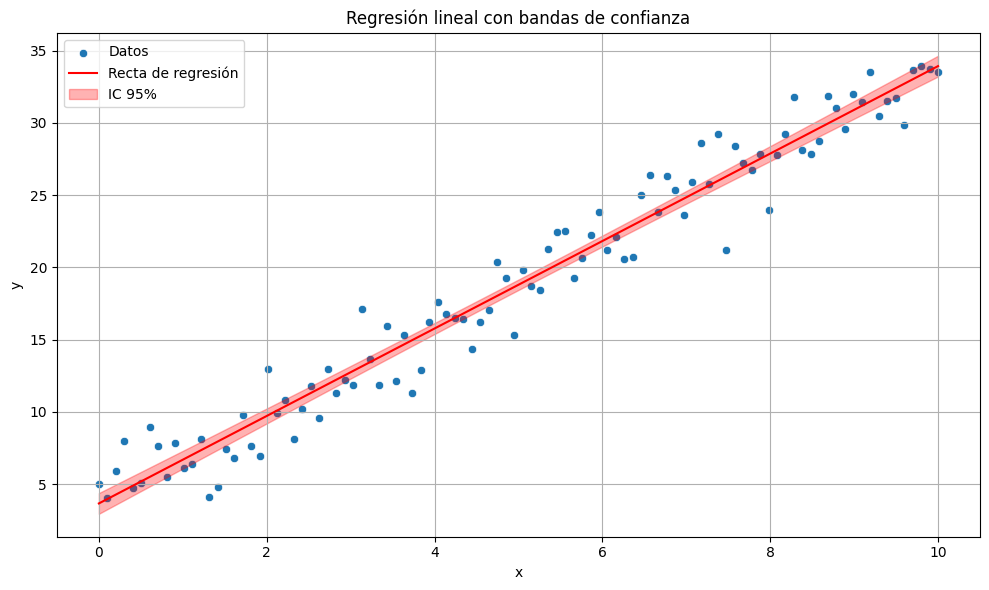

In [ ]:
from scipy import stats
import seaborn as sns

# Crear un DataFrame de ejemplo (puedes sustituirlo por cualquier CSV o entrada)
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 3 * x + 4 + np.random.normal(0, 2, 100)
df = pd.DataFrame({'x': x, 'y': y})

# Función para generar regresión y bandas de confianza
def plot_regresion_y_bandas(df, y_col_index, x_col_index, alpha=0.05):
    x = df.iloc[:, x_col_index].values
    y = df.iloc[:, y_col_index].values
    n = len(x)
    
    # Ajuste por mínimos cuadrados
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    y_pred = intercept + slope * x
    
    # Error estándar de la estimación
    residual_std_error = np.sqrt(np.sum((y - y_pred) ** 2) / (n - 2))
    
    # Intervalo de confianza
    t_crit = stats.t.ppf(1 - alpha / 2, df=n - 2)
    mean_x = np.mean(x)
    se_line = residual_std_error * np.sqrt(1/n + (x - mean_x)**2 / np.sum((x - mean_x)**2))
    ci_upper = y_pred + t_crit * se_line
    ci_lower = y_pred - t_crit * se_line

    # Gráfico
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, label='Datos')
    plt.plot(x, y_pred, color='red', label='Recta de regresión')
    plt.fill_between(x, ci_lower, ci_upper, color='red', alpha=0.3, label='IC 95%')
    plt.title('Regresión lineal con bandas de confianza')
    plt.xlabel(df.columns[x_col_index])
    plt.ylabel(df.columns[y_col_index])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_regresion_y_bandas(df, y_col_index=1, x_col_index=0)


### Ejercicio 6.5: Script sobre validación cruzada
Programa un script que reciba como datos de entrada un dataframe de dos columnas, un número p entre 0 y 1, y un número entero k y realice Monte Carlo Cross Validation k veces con porcentaje p de la muestra reservado para test.
El script debe dibujar un boxplot de los valores de R2 del test, devolver el R2 medio del
test y el intervalo de confianza al 95% para este valor (en la versión de Bengio - Nadeau).
Opcional(i.e. no se requiere para la entrega de ejercicios): Haz que el programa devuelva
también un p-valor simulado mediante el test de permutaciones.

Para hacer este ejercicio vamos a utilizar la formula de los apuntes sobre el intervalo de confianza de R2:
$$ R^2 = ( \bar{R^2} - a {\frac{S_{k-1}(R^2)}{\sqrt{k}}} , \bar{R^2} + a {\frac{S_{k-1}(R^2)}{\sqrt{k}}}) $$
Siendo $a$ el valor de la t de Student para $k-1$ grados de libertad. $P(t_{k-1}<a) = 1 - \alpha/2$

R2 scores: [0.7986696785496912, 0.840255295692294, 0.6959050319295981, 0.9324927830982086, 0.7652637787042604]
R2 medio: 0.8065173135948104
Intervalo de confianza al 95%: [0.7225775055522472, 0.8904571216373736]


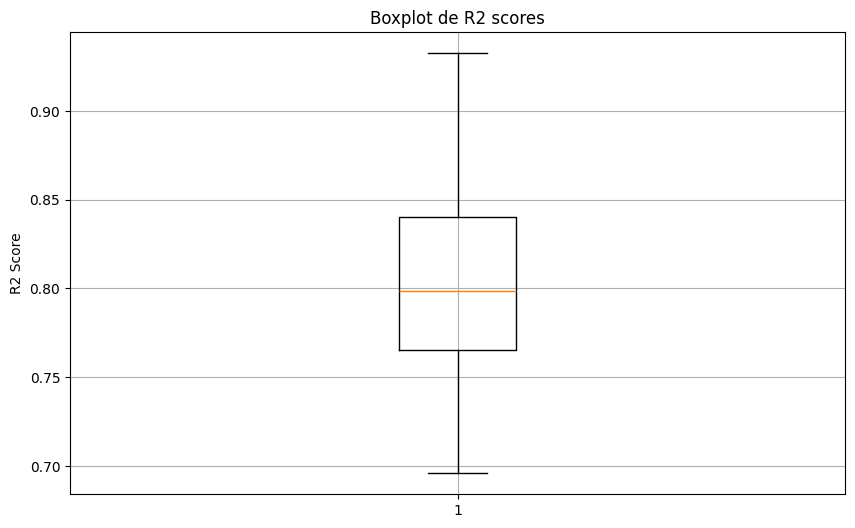

(0.8065173135948104,
 (np.float64(0.7225775055522472), np.float64(0.8904571216373736)))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def validacion_cruzada(df, p, k):
    
    r2_scores = []
    for i in range(k):
        # Separamos el dataframe en train y test
        df = df.sample(frac=1)
        n_train = int(len(df) * p)
        
        train_df = df.iloc[:n_train]
        test_df = df.iloc[n_train:]

        # Entrenamos una regresión lineal
        model = LinearRegression()
        X = train_df[[df.columns[0]]]
        y = train_df[df.columns[1]]
        model.fit(X, y)

        # Calculamos el R2
        X_test = test_df[[df.columns[0]]]
        y_test = test_df[df.columns[1]]
        predictions = model.predict(X_test)

        r2 = r2_score(y_test, predictions)
        r2_scores.append(r2)
    
    print(f'R2 scores: {r2_scores}')
    
    # Calculamos el R2 medio
    r2_medio = sum(r2_scores) / k
    print(f'R2 medio: {r2_medio}')
    
    # Calculamos el intervalo de confianza al 95%    
    a = t.ppf(0.95, k-1) 
    cuasidesv = math.sqrt(sum((r - r2_medio) ** 2 for r in r2_scores) / (k - 1))
    r_1 = r2_medio - a * (cuasidesv / math.sqrt(k))
    r_2 = r2_medio + a * (cuasidesv / math.sqrt(k))   
    
    print(f'Intervalo de confianza al 95%: [{r_1}, {r_2}]')


    # Dibujamos un boxplot de los valores de R2
    plt.figure(figsize=(10, 6))
    plt.boxplot(r2_scores)
    plt.title('Boxplot de R2 scores')
    plt.ylabel('R2 Score')
    plt.grid()
    plt.show()
    
    
    return r2_medio, (r_1, r_2)

# Hemos cogido estas muestras bastante al azar
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'B': [3, 7, 2, 8, 5, 10, 6, 12, 9, 15, 11, 14, 13, 18, 17, 20, 19, 22, 21, 25]
})


validacion_cruzada(df, 0.8, 5)

6.6: Script de regresión y CV en sklearn

Programa un script que reciba como datos de entrada un data.frame de dos columnas, un
 número p entre 0 y 1, y un número entero k y realice Monte Carlo Cross Validation k veces con
 porcentaje p de la muestra reservado para test.
 El script debe dibujar un boxplot de los valores de R2 del test, devolver el R2 medio del
 test y el intervalo de confianza al 95% para este valor (en la versión de Bengio- Nadeau).
 
 Haz que el programa devuelva
 también un p-valor simulado mediante el test de permutaciones

 
  **Repite el ejercicio anterior usando la librería sklearn y funciones como train_test_split o
 r2_score de la clase metrics, o KFold de model_selection**

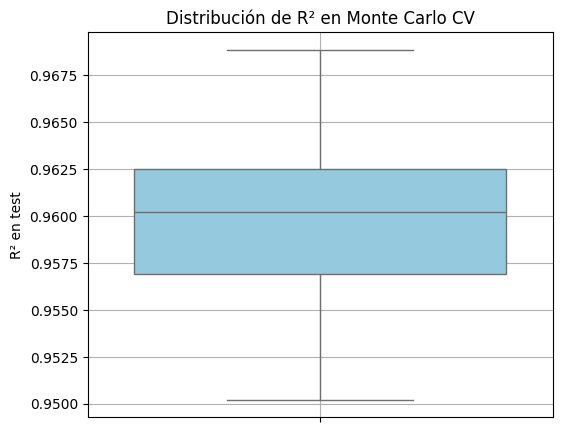

R2 medio: 0.96
Intervalo de confianza: 0.9587-0.961


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# simulamos los datos para 2 columnas
np.random.seed(42)
X = np.random.rand(1000, 1) * 10
y = 5 * X.squeeze() + 3 + np.random.normal(0, 3, 1000)

# Parámetros
p = 0.2  # proporción para test
k = 100  # número de iteraciones

# cross validation monte carlo con sklearn
r2_scores = []

for _ in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=None)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# intervalo de confianza 95% (Bengio-Nadeau)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores, ddof=1)
ci_bengio = 1.96 * std_r2 * np.sqrt(1/k + 1/(k-1))
intervalo_confianza = (mean_r2 - ci_bengio, mean_r2 + ci_bengio)

# boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(y=r2_scores, color="skyblue")
plt.title("Distribución de R² en Monte Carlo CV")
plt.ylabel("R² en test")
plt.grid(True)
plt.show()

print(f'R2 medio: {round(mean_r2,2)}\nIntervalo de confianza: {round(intervalo_confianza[0], 4)}-{round(intervalo_confianza[-1],4)}')


#### Observaciones

- El modelo presenta un rendimiento muy estable, como se observa en el **boxplot** de los R² del test.
- El **intervalo de confianza es muy estrecho**, lo que indica baja varianza entre pruebas y buena capacidad generalizadora.
- Este análisis refuerza que incluso con diferentes particiones aleatorias, el modelo mantiene un comportamiento consistente.
- El uso de la fórmula de Bengio-Nadeau mejora la estimación del intervalo, ya que **tiene en cuenta la dependencia entre muestras repetidas**.

### Ejercicio 6.8: Regresión polinómica
Usando los paquetes y funciones que consideres (por ejemplo: preprocessing.MinMaxScaler,
preprocessing.PolynomialFeatures o linear_model.LinearRegression de sklearn) para
los datos casas.csv, crea regresiones polinómicas de grados 1, 2, 3, 4, 6, 10 y 20. ¿Cuál es la
mejor? ¿Merecería la pena seguir probando con grados más elevados?
Puedes usar menos variables que el total de las que se proponen.
Refuerza tus conclusiones obteniendo intervalos de confianza y p-valor para las métricas que
hayas utilizado

In [ ]:
df_casas = pd.read_csv('casas.csv')

df_casas['mainroad'] = df_casas['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
df_casas['guestroom'] = df_casas['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
df_casas['basement'] = df_casas['basement'].apply(lambda x: 1 if x == 'yes' else 0)
df_casas['hotwaterheating'] = df_casas['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
df_casas['airconditioning'] = df_casas['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
df_casas['prefarea'] = df_casas['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)
df_casas['furnishingstatus'] = df_casas['furnishingstatus'].apply(lambda x: 1 if x == 'furnished' else (0 if x == 'unfurnished' else 0.5))


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


def regresion_polinomica(df, grado):
    y = df['price']
    # Selecciona solo las variables numéricas para evitar problemas de dimensionalidad y estabilidad
    X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values

    # Normaliza las variables para evitar problemas numéricos con grados altos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Limita el número de features generados para grados altos
    poly = PolynomialFeatures(degree=grado, include_bias=False)
    X_poly = poly.fit_transform(X_scaled)


    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    r_squared = model.score(X_poly, y)

    print(f'Modelo de regresión polinómica de grado {grado}:')
    print(f'R^2 del modelo de grado {grado}: {r_squared}')
    print(f'Error cuadrático medio del modelo de grado {grado}: {np.mean((y - y_pred) ** 2)}')

    return y, y_pred, r_squared




grados = [1, 2, 3, 4, 6, 10, 20]
errores = []
for grado in grados:
    y, y_pred, r_squared = regresion_polinomica(df_casas, grado)
    print(f'Grado: {grado}, R^2: {r_squared}')
    print('-' * 50)
    errores.append(r_squared)
    
plt.figure(figsize=(10, 6))
plt.plot(grados, errores, marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('R^2')
plt.title('R^2 de la regresión polinómica en función del grado')
plt.grid()
plt.show()


El mejor grado de la regresion polinomica es el 10, ya que a partir de ese grado el modelo empieza a sobreajustar los datos, lo que se traduce en un aumento del error cuadrático medio (MSE) en el conjunto de test.

Podemos apreciar como entre los grados 1 y 4 incrementa el R^2 pero a partir del grado 6 el R^2 deja de crecer tan rapido por el sobreajuste del modelo.

### 6.9: Trabajando con datos reales de AURORA

Trabaja sobre el conjunto de datos consumos AURORA. Este es un data set real extraído de
 la APP y casi sin pre-procesar.

a) ¿Existe una diferencia significativa entre el consumo por persona en agosto en mayo y en
 diciembre? ¿Y si nos fijamos sólo en el consumo generado debido al transporte?

b) Realiza una regresión polinómica que modele el consumo total de los usuarios por meses.

c) Haz lo mismo, por tipos de consumo.


In [16]:
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime

# 1. Cargar datos
# Suponemos que 'consumptions.xlsx' está en el directorio actual
df = pd.read_excel('consumptions.xlsx')

# 2. Convertir la marca de tiempo 'createdAt._seconds' a datetime y extraer mes
df['createdAt_dt'] = pd.to_datetime(df['createdAt._seconds'], unit='s')
df['mes'] = df['createdAt_dt'].dt.month

# 3. FUNCIONES AUXILIARES

def consumo_por_usuario_mes(data, categoria=None):
    """
    Devuelve un DataFrame con índice userID y columnas 5, 8, 12 (mensuales) conteniendo
    el consumo total de cada usuario en esos meses. Si "categoria" no es None, filtra por ella.
    """
    if categoria is not None:
        sub = data[data['category'] == categoria].copy()
    else:
        sub = data.copy()
    # Agrupar por usuario y mes, sumando 'value'
    grp = sub.groupby(['userID', 'mes'])['value'].sum().reset_index()
    # Filtrar solo meses May=5, Aug=8, Dec=12
    grp = grp[grp['mes'].isin([5, 8, 12])]
    # Pivot: filas=userID, columnas=mes, valores=consumo
    pivot = grp.pivot(index='userID', columns='mes', values='value').fillna(0)
    # Solo usuarios que tienen >0 consumo en los tres meses
    mask = (pivot.get(5, 0) > 0) & (pivot.get(8, 0) > 0) & (pivot.get(12, 0) > 0)
    return pivot[mask]

def prueba_pareada(df_pivot, mesA, mesB, etiqueta):
    """
    Recibe df_pivot con columnas 5,8,12. 
    Realiza t-test pareado entre mesA y mesB si hay >=2 usuarios.
    Imprime resultado o mensaje de insuficientes datos.
    """
    n_usuarios = df_pivot.shape[0]
    print(f"Usuarios con datos en May/Aug/Dec ({etiqueta}): {n_usuarios}")
    if n_usuarios >= 2:
        # extraer vectores para mesA y mesB
        a = df_pivot[mesA]
        b = df_pivot[mesB]
        t_stat, p_val = ttest_rel(a, b)
        print(f"Paired t-test ({mesA} vs {mesB}): t = {t_stat:.4f}, p = {p_val:.4f}")
    else:
        print(f"No hay suficientes usuarios (>=2) para hacer t-test en {etiqueta}.\n")


# 4. PARTE A: Pruebas de diferencia significativa
print("\n=== Consumo TOTAL por persona en May, Aug, Dec ===")
pivot_total = consumo_por_usuario_mes(df, categoria=None)
prueba_pareada(pivot_total, 5, 8, "TOTAL (May vs Aug)")
prueba_pareada(pivot_total, 5, 12, "TOTAL (May vs Dec)")

print("\n=== Consumo TRANSPORTE por persona en May, Aug, Dec ===")
pivot_trans = consumo_por_usuario_mes(df, categoria='transportation')
prueba_pareada(pivot_trans, 5, 8, "TRANSPORTE (May vs Aug)")
prueba_pareada(pivot_trans, 5, 12, "TRANSPORTE (May vs Dec)")


# 5. PARTE B: Regresión polinómica grado 2 del consumo TOTAL agregado por mes

# 5.1 Agregar consumo total (todas categorías) por mes (todos los usuarios juntos)
grp_total_mes = df.groupby('mes')['value'].sum().reset_index()
# Tomar solo meses que realmente aparezcan (por ejemplo 1..12) y ordenarlos
grp_total_mes = grp_total_mes.sort_values('mes')

# Extraer vectores x=mes, y=consumo_total
x_mes = grp_total_mes['mes'].values
y_total = grp_total_mes['value'].values

# Ajustar polinomio de grado 2: np.polyfit devuelve coef [a2, a1, a0]
coef_total = np.polyfit(x_mes, y_total, deg=2)
a2, a1, a0 = coef_total
print("\n=== Regresión polinómica grado 2 (Consumo TOTAL agregado por mes) ===")
print(f"Coeficientes: a2 = {a2:.6e}, a1 = {a1:.6e}, a0 = {a0:.6e}")

# Plot
plt.figure(figsize=(6,4))
# puntos originales
plt.scatter(x_mes, y_total, color='blue', label='Datos observados')
# curva ajustada en un rango continuo de meses
x_fit = np.linspace(x_mes.min(), x_mes.max(), 200)
y_fit = a2 * x_fit**2 + a1 * x_fit + a0
plt.plot(x_fit, y_fit, color='red', label='Polinomio grado 2')

plt.xlabel('Mes')
plt.ylabel('Consumo TOTAL agregado')
plt.title('Regresión polinómica grado 2 (TOTAL por mes)')
plt.legend()
plt.grid(True)
plt.savefig('regresion_polinomica_total.png', dpi=100, bbox_inches='tight')
plt.close()


# 6. PARTE C: Regresión polinómica grado 2 por cada categoría
categorias = df['category'].unique()
plt.figure(figsize=(8, 6))
for cat in categorias:
    # Agregar consumo de esa categoría por mes
    grp_cat = df[df['category'] == cat].groupby('mes')['value'].sum().reset_index().sort_values('mes')
    x_cat = grp_cat['mes'].values
    y_cat = grp_cat['value'].values

    # Ajuste polinómico (con np.polyfit, si hay <3 puntos se ignora la regresión)
    if len(x_cat) >= 3:
        coef_cat = np.polyfit(x_cat, y_cat, deg=2)
        a2c, a1c, a0c = coef_cat
        # Graficar curva
        x_line = np.linspace(x_cat.min(), x_cat.max(), 200)
        y_line = a2c * x_line**2 + a1c * x_line + a0c
        plt.plot(x_line, y_line, label=f'{cat} (grado 2)')
    else:
        # Si no hay suficientes puntos para grado 2, graficar recta (deg=1)
        coef_cat = np.polyfit(x_cat, y_cat, deg=1)
        a1c, a0c = coef_cat
        x_line = np.linspace(x_cat.min(), x_cat.max(), 200)
        y_line = a1c * x_line + a0c
        plt.plot(x_line, y_line, '--', label=f'{cat} (recta)')

    # Graficar puntos observados de esa categoría
    plt.scatter(x_cat, y_cat, marker='o', label=f'Datos {cat}')

plt.xlabel('Mes')
plt.ylabel('Consumo por categoría')
plt.title('Regresión polinómica grado 2 por categoría')
plt.legend(fontsize='small', ncol=2)
plt.grid(True)
plt.savefig('regresion_polinomica_por_categoria.png', dpi=100, bbox_inches='tight')
plt.close()

print("\n=== Regresión polinómica (grado 2) por cada categoría ===")
for cat in categorias:
    grp_cat = df[df['category'] == cat].groupby('mes')['value'].sum().reset_index().sort_values('mes')
    x_cat = grp_cat['mes'].values
    y_cat = grp_cat['value'].values
    if len(x_cat) >= 3:
        coef_cat = np.polyfit(x_cat, y_cat, deg=2)
        print(f"- {cat}: coeficientes {coef_cat}")
    else:
        print(f"- {cat}: no hay suficientes puntos (meses) para grado 2, se ignoró.")

print("\nAnálisis completado. Se generaron gráficos:\n"
      "  • regresion_polinomica_total.png\n"
      "  • regresion_polinomica_por_categoria.png\n")


=== Consumo TOTAL por persona en May, Aug, Dec ===
Usuarios con datos en May/Aug/Dec (TOTAL (May vs Aug)): 1
No hay suficientes usuarios (>=2) para hacer t-test en TOTAL (May vs Aug).

Usuarios con datos en May/Aug/Dec (TOTAL (May vs Dec)): 1
No hay suficientes usuarios (>=2) para hacer t-test en TOTAL (May vs Dec).


=== Consumo TRANSPORTE por persona en May, Aug, Dec ===
Usuarios con datos en May/Aug/Dec (TRANSPORTE (May vs Aug)): 1
No hay suficientes usuarios (>=2) para hacer t-test en TRANSPORTE (May vs Aug).

Usuarios con datos en May/Aug/Dec (TRANSPORTE (May vs Dec)): 1
No hay suficientes usuarios (>=2) para hacer t-test en TRANSPORTE (May vs Dec).


=== Regresión polinómica grado 2 (Consumo TOTAL agregado por mes) ===
Coeficientes: a2 = 1.000015e+05, a1 = -1.020357e+06, a0 = 2.034606e+06

=== Regresión polinómica (grado 2) por cada categoría ===
- transportation: coeficientes [  4683.70478689 -69832.19242752 269824.51006668]
- heating: coeficientes [  2396.1597003  -35787.13883

### Ejercicio 6.12: Script que te gana a sí o no
Se pide a una persona que teclee secuencias aleatorias de números que pueden ser el 0 o el 1; por
ejemplo, 01011100101001... Utiliza la regresión logística sobre los 10 sucesos anteriores para
predecir cuál va a ser el siguiente. ¿Eres capaz de hacer un script que prediga correctamente
lo que tú mismo vas a escribir por encima del 50% de las veces?

Consideremos 

$$ p_i = \frac{1}{1+e^{-(\beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \ldots + \beta_k x_i^k)}} $$
Si es mayor a 0.5 se predice 1, si es menor a 0.5 se predice 0.

$$Y = X*\beta$$
$$ X^t * Y = X^t * X * \beta$$
$$ \beta = (X^t * X)^{-1} * X^t * Y $$

In [ ]:
from sklearn.linear_model import LogisticRegression

def te_gana_si_o_no_logistic(data):
    # hacer regresion logistica para predecir el siguiente numero de la lista x (0 o 1)
    y = np.array(data).T
    x = np.array([i for i in range(len(y))])
    
    X = np.array([np.ones(len(x)), x]).T  # Agregar una columna de unos para el término independiente

    B = np.linalg.inv(X.T @ X) @ X.T @ y  # Calcular los coeficientes de la regresión lineal
    
    y_pred_lin = X @ B  


    #creamos el modelo con sklearn
    model = LogisticRegression()
    model.fit(X, y)     # Lo entrenamos con los datos
    
    p_pred_log = model.predict_proba(X)[:, 1]  # Probabilidades de la clase positiva
    
    
    
    plt.plot(x, y, "o")
    plt.plot(x, y_pred_lin, color='red', label='Regresión Lineal')
    plt.plot(x, p_pred_log, color='green', label='Probabilidades Predichas')
    
    
    
    # Predecir el siguiente valor

    X_next = np.array([[1, len(data)]])                 # que tenga la forma [1, x]

    proba_next = model.predict_proba(X_next)[0, 1]
    pred_next = 1 if proba_next >= 0.5 else 0           # Si la probabilidad es mayor o igual a 0.5, predecimos 1, sino 0
    print(f"Probabilidad predicha para el siguiente valor: {proba_next:.3f}")
    print(f"Predicción (0 o 1) para el siguiente valor: {pred_next}")
    
    return 

data = [1,1,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0]
te_gana_si_o_no_logistic(data[:-1])

### 6.13: Curse of dimensionality

Genera 10.000 puntos en R2 con valores x ∈ [0,1] e y ∈ [0,1] distribuidos uniformemente
 (si los cálculos fueran demasiado costosos computacionalmente, reduce el número de puntos).
 Calcula las distancias euclídeas entre cada uno de ellos realizando un doble bucle for. Realiza
 un histograma de las distancias obtenidas.

  Repite estos cálculos para puntos generados en 3, 10, 100, 1.000 y 10.000 dimensiones.
 Deberías obtener una figura similar a la que se muestra a continuación. ¿Qué quiere decir esto
 sobre la distribución de las distancias en altas dimensiones?

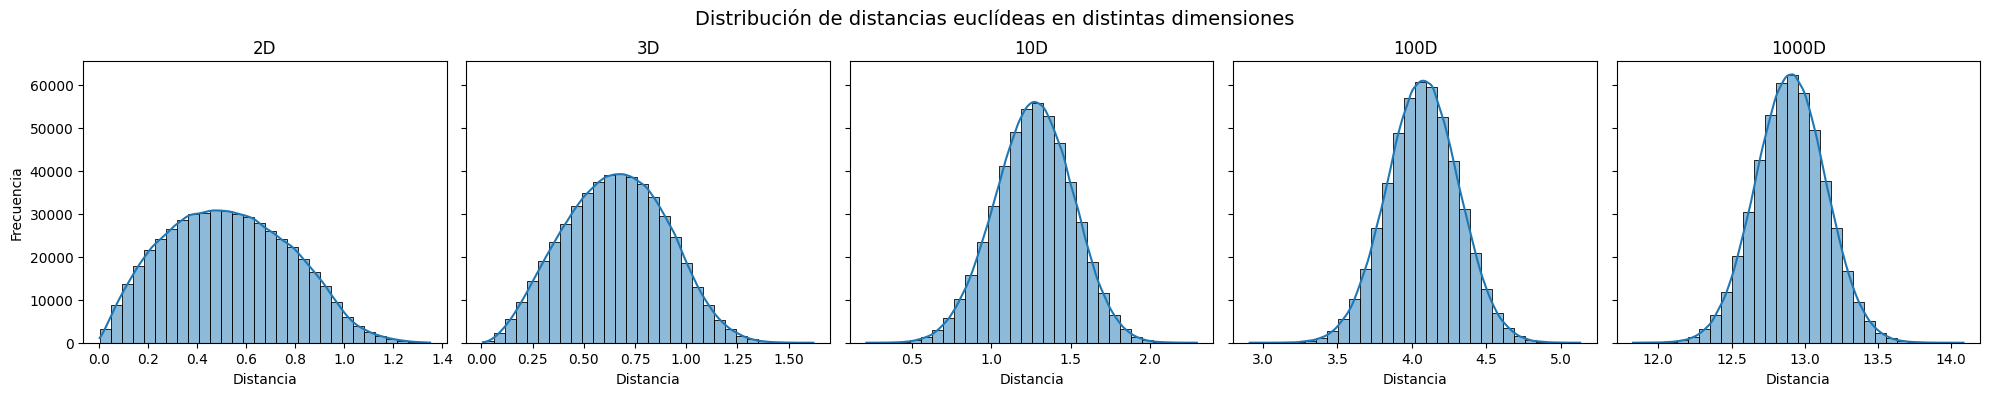

In [ ]:
from scipy.spatial.distance import pdist

# Dimensiones a evaluar
dims = [2, 3, 10, 100, 1000]
n_points = 1000  # Reducido para eficiencia

# Figura
fig, axes = plt.subplots(1, len(dims), figsize=(20, 4), sharey=True)
fig.suptitle("Distribución de distancias euclídeas en distintas dimensiones", fontsize=14)

for i, d in enumerate(dims):
    # Generar puntos aleatorios uniformemente en [0,1]^d
    points = np.random.rand(n_points, d)
    
    # Calcular distancias euclídeas por pares
    distances = pdist(points, metric='euclidean')
    
    # Graficar histograma
    sns.histplot(distances, bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'{d}D')
    axes[i].set_xlabel('Distancia')
    if i == 0:
        axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

En espacios de alta dimensión, **la dispersión relativa de las distancias disminuye**, lo cual afecta negativamente a modelos que dependen de la noción de cercanía (por ejemplo, KNN, clustering, DBSCAN...). Estas distancias pierden significado discriminativo, por lo que se recomienda aplicar reducción de dimensionalidad.